**Full Name - Student ID:** Nguyen Cong Phat 

**Student ID:** 23521143

**Subject:** Mathematics for Computer Science

**Class:** CS115.P12

**Assignment 1:** Linear Regression with Normal Equations, Gradient Descent, and Stochastic Gradient Descent


# Outline
- [ Boston Housing Dataset ](#0)
- [ Import libraries ](#1)
- [ Simple Linear Regression (1 independent variable + 1 target variable) ](#2)
  - [ Experiment with Original Data ](#2.1)
    - [ Load Data ](#ex01)
    - [ Train-Test Set Spliting ](#ex02)
    - [ Preprocessing Data ](#ex02)
    - [ Data Visualization ](#ex03)
    - [ Linear Regression (Base) ](#ex04)
    - [ Gradient Descent ](#ex05)
    - [ Stochastic Gradient Descent ](#ex06)
    - [ Normal Equation (sklearn) ](#ex07)
    - [ Visualize all models on Training Data ](#ex08)
    - [ Algorithms Comparisons (Weight Comparisons and Perfomance Comparisons)](#ex09)
  - [ Experiment with Standardized Data ](#2.2)
    - [ Re-load data ](#ex01)
    - [ Preprocessing Standardized Data ](#ex01)
    - [ Gradient Descent ](#ex01)
    - [ Stochastic Gradient Descent ](#ex02)
    - [ Normal Equation (sklearn) ](#ex03)
    - [ Visualize all models on Training Data ](#ex04)
    - [ Algorithms Comparisons (Weight Comparisons and Perfomance Comparisons)](#ex05)
- [ Multiple Linear Regression (n independent variable (n >=2) + 1 target variable) ](#3)
  - [ Experiment with Normal Data ](#3.1)
    - [ Re-load Dataset ](#ex01)
    - [ Preprocessing Data ](#ex02)
    - [ Data Visualization ](#ex03)
    - [ Gradient Descent ](#ex01)
    - [ Stochastic Gradient Descent ](#ex02)
    - [ Normal Equation (sklearn) ](#ex03)
    - [ Algorithms Comparisons (Weight Comparisons and Perfomance Comparisons)](#ex04)
  - [ Experiment with Standardized Data ](#3.1)
    - [ Re-load Dataset ](#ex01)
    - [ Preprocessing Data ](#ex02)
    - [ Gradient Descent ](#ex01)
    - [ Stochastic Gradient Descent ](#ex02)
    - [ Normal Equation (sklearn) ](#ex03)
    - [ Algorithms Comparisons (Weight Comparisons and Perfomance Comparisons)](#ex04)
- [ Explain what $R^2$ coefficient is ](#4)

# Boston Housing Dataset

🏠🏠 **Dataset Information (boston_housing.csv)** 🏠🏠
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per $10,000
- PTRATIO : pupil-teacher ratio by town
- B : 1000(Bk – 0.63)2 where Bk is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in $1000’s

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from utils import *
import copy
import math
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2


ModuleNotFoundError: No module named 'utils'

In [ ]:
# test
#for i in range (3): print(i)


# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [ ]:
import pandas as pd

In [ ]:
housing_dataset = pd.read_csv('D:/CS115.P12/Assignment_1/boston_housing.csv')
housing_dataset.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
housing_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing_dataset.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [ ]:
missing_values_1variable_before = housing_dataset.isna().sum()
print ("Mising values on Dataset before Standardizing:\n", missing_values_1variable_before)

Mising values on Dataset before Standardizing:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [ ]:
X = housing_dataset['RM']
y = housing_dataset['MEDV']


In [ ]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Preprocessing Data

In [ ]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)


In [ ]:
# print X_train
print("Type of X_train:",type(X_train))
print("Shape of X_train:", X_train.shape)
print("First five elements of X_train are:\n", X_train[:5]) 

# print y_train
print("\nType of y_train:",type(y_train))
print ("Shape of y_train:", y_train.shape)
print("First five elements of y_train are:\n", y_train[:5])  


Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (354, 1)
First five elements of X_train are:
 [[6.43 ]
 [6.176]
 [5.682]
 [5.935]
 [5.926]]

Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (354,)
First five elements of y_train are:
 5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: MEDV, dtype: float64


### Data Visualization

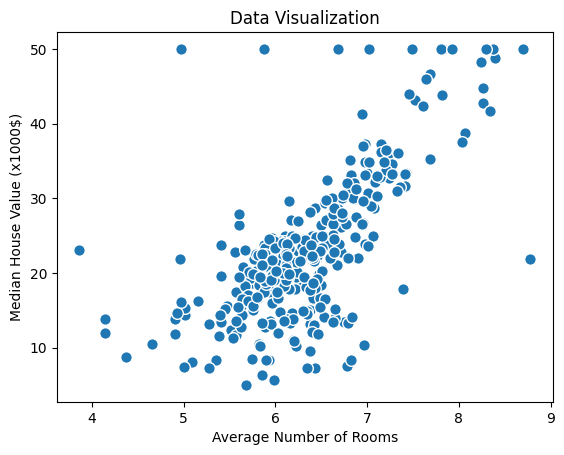

In [ ]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.title('Data Visualization')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')

plt.show()

### Linear Regression (Base)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
        

LinearRegression(fit_intercept=False)

### Gradient Descent

In [ ]:
class LinearRegression_GD:
  def __init__(self, eta, max_iter, random_state = None):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.b = 0
    self.costs = []
  
  def fit(self, X, y):
    if self.random_state:
      np.random.seed(self.random_state)
    
    m = len(y)
    self.w = np.zeros(X.shape[1])
    for i in range(self.max_iter):
      y_pred = X.dot(self.w)
      error = y_pred - y
      gradients = (1/m) * X.T.dot(error)
      self.w = self.w - self.eta * gradients

      cost = (1 / (2 * m)) * np.sum((X.dot(self.w) - y) ** 2)
      self.costs.append(cost)
  
  def predict(self, X):
    return X.dot(self.w)


  def MSE_score(self, X, y):
    y_pred = self.predict(X)
    return np.sum((y - y_pred) ** 2) / y.shape
  
  def R2_score(self, X, y):
    y_pred = self.predict(X)
    y_mean = np.mean(y)
    return (1 - (np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)))


  def visualize_cost(self, X, y):
    cost = self.fit(X, y)
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Gradient Descent')
    plt.show()

- Requirement: Experiment with
    - Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
    - Maximum number of iterations = 200
    - Random state = 42
- What is the suitable 'learning rate' value?

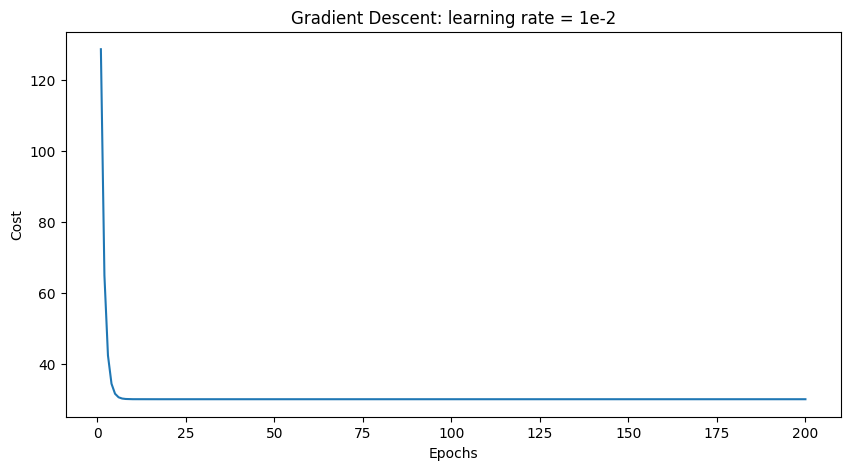

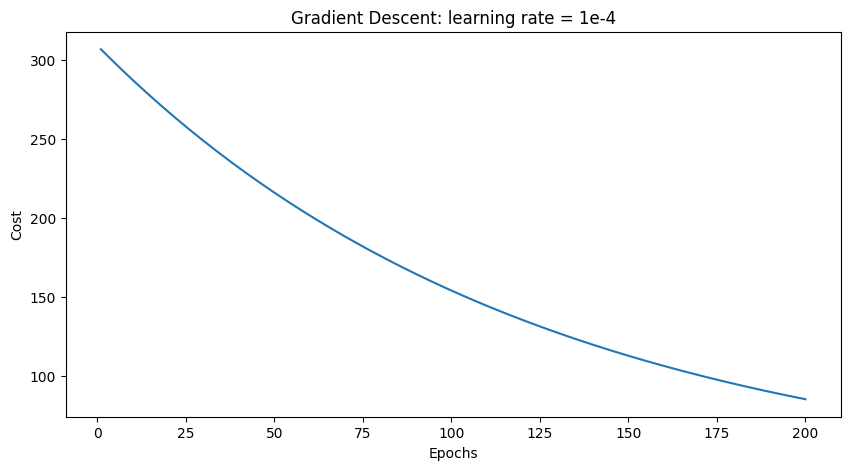

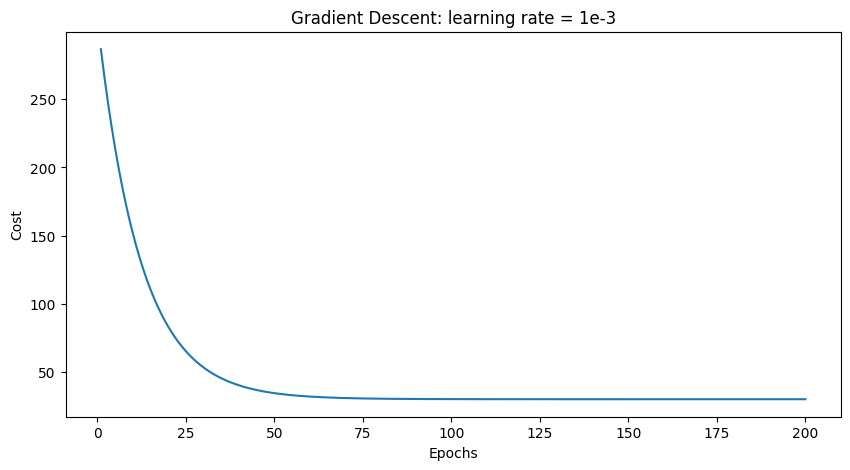

In [ ]:
# Initialize the model
Diff_learning_rate = [1e-2, 1e-4, 1e-3]
for eta in Diff_learning_rate:
    reg_GD = LinearRegression_GD(eta, max_iter=200, random_state=42)
    
    # Train model
    reg_GD.fit(X_train, y_train)

    # Visualize the cost trend
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    if eta == 1e-2:
        plt.title('Gradient Descent: learning rate = 1e-2')
    elif eta == 1e-3:
        plt.title('Gradient Descent: learning rate = 1e-3')
    else:
        plt.title('Gradient Descent: learning rate = 1e-4')
    plt.show()

📚📚 **What is suitable 'learning rate' value?** 📚📚

**Summary of Observations from 3 images with different learning rate values:**
- **Learning rate = 1e-2** (The first image): Rapid initial convergence but unstable with oscillations.
- **Learning rate = 1e-4** (The second image): Stable but extremely slow convergence.
- **Learning rate = 1e-3** (The third image): Steady convergence and good balance between speed and stability.

**Conclusion:** 
Based on the analysis, a learning rate of **1e-3** appears to be the most suitable for this gradient descent implementation. It provides a good balance between convergence speed and stability.

In [ ]:
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42) #select learning rate = 1e-3
reg_GD.fit(X_train, y_train)


Visualize the prediction of Gradient Descent model on Training Data

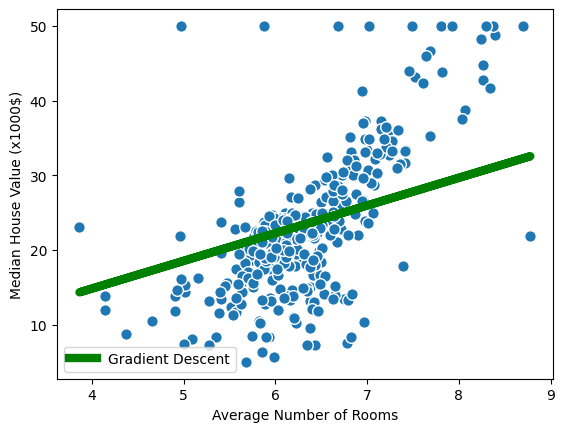

In [ ]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [ ]:
# Initialize the model

reg_SGD =  SGDRegressor(eta0=1e-4, max_iter=200,random_state=42)


# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=200, random_state=42)

In [ ]:
reg_SGD.w = np.append(reg_SGD.intercept_, reg_SGD.coef_)
reg_SGD.w 

array([0.48447384, 3.62945908])

Visualize the prediction of Stochastic Gradient Descent model on Training Data

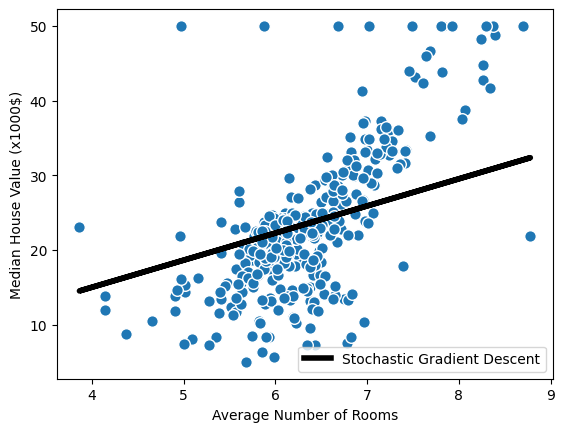

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Intialize the Normal Equation model
reg_NE =  LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg_NE.w = np.append(reg_NE.intercept_, reg_NE.coef_)
reg_NE.w

array([-34.66230744,   9.1181022 ])

Visualize the prediction of Normal Equation model on Training Data

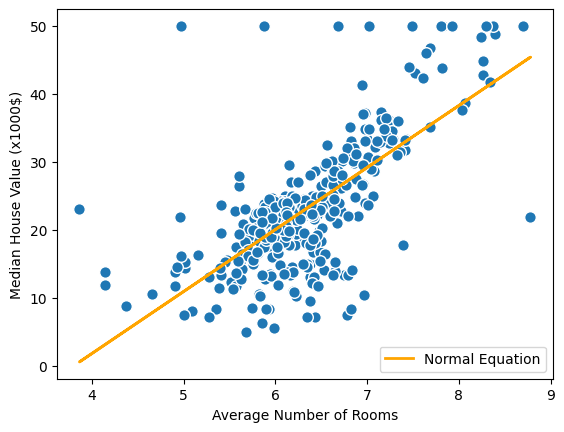

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

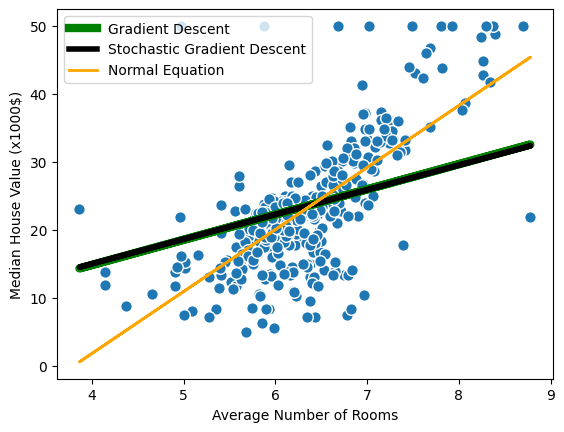

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [ ]:
w_GD = np.append(reg_GD.b, reg_GD.w)
w_SGD = reg_SGD.w
w_NE = reg_NE.w
print(w_GD)
print(w_SGD)
print(w_NE)

[0.         3.70726922]
[0.48447384 3.62945908]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [ ]:
y_pred_GD = reg_GD.predict(X_test)


In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
y_pred_NE = reg_NE.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.394363
MAE of SGD: 5.413509
MAE of NE: 4.314224


In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 54.38964
MSE of SGD: 54.750232
MSE of NE: 40.35145


In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.270066
R2 of SGD: 0.265227
R2 of NE: 0.458465


## Experiment with Standardized Data

### Re-load data

In [ ]:
# Re-load the dataset
housing_dataset = pd.read_csv('D:/CS115.P12/Assignment_1/boston_housing.csv')
housing_dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler


In [ ]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [ ]:
missing_values_1variable_after = housing_dataset.isna().sum()
print ("Missing values on dataset after Standardizing\n", missing_values_1variable_after)

Missing values on dataset after Standardizing
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset['RM']
y = housing_dataset['MEDV']

In [ ]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Preprocessing Standardized Data

In [ ]:
X_train_norm = X_train_norm.values.reshape(-1, 1)
X_test_norm = X_test_norm.values.reshape(-1, 1)

In [ ]:
# print X_train
print("Type of X_train:",type(X_train_norm))
print("Shape of X_train:", X_train_norm.shape)
print("First five elements of X_train are:\n", X_train_norm[:5]) 

# print y_train
print("\nType of y_train:",type(y_train))
print ("Shape of y_train:", y_train.shape)
print("First five elements of y_train are:\n", y_train[:5])  


Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (354, 1)
First five elements of X_train are:
 [[ 0.20709638]
 [-0.15476692]
 [-0.85854831]
 [-0.49810966]
 [-0.51093159]]

Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (354,)
First five elements of y_train are:
 5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: MEDV, dtype: float64


### Gradient Descent

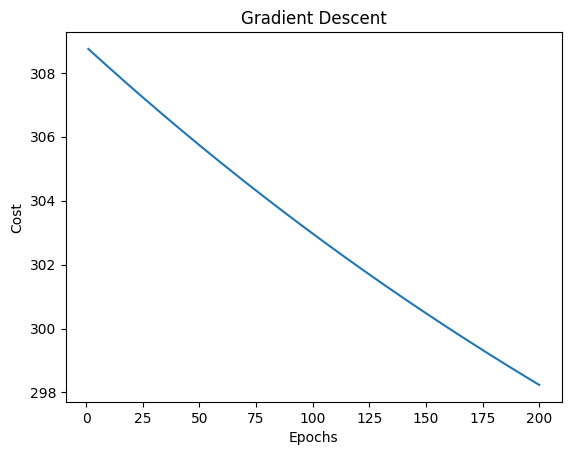

In [ ]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



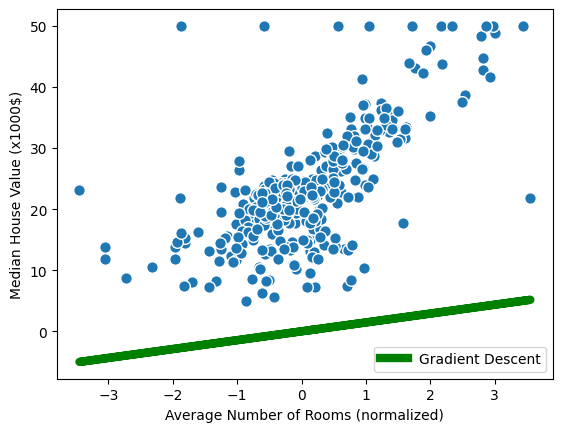

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(eta0=1e-3, max_iter=200,random_state=42, learning_rate='constant')

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

In [ ]:
reg_SGD.w = np.append(reg_SGD.intercept_, reg_SGD.coef_)
reg_SGD.w

array([22.62083926,  6.39567675])

Visualize the prediction of Stochastic Gradient Descent model on Training Data


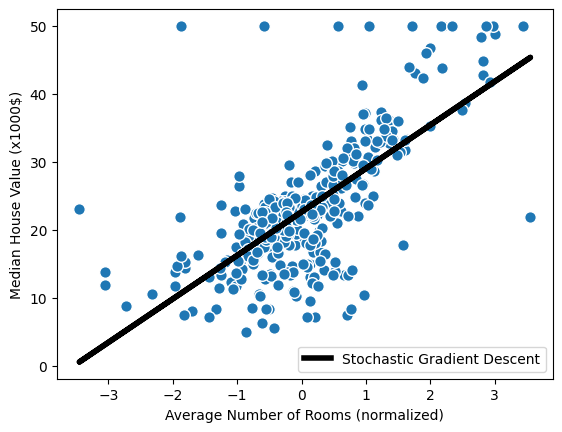

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [ ]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

In [ ]:
reg_NE.w = np.append(reg_NE.intercept_, reg_NE.coef_)
reg_NE.w

array([22.64163118,  6.40020122])

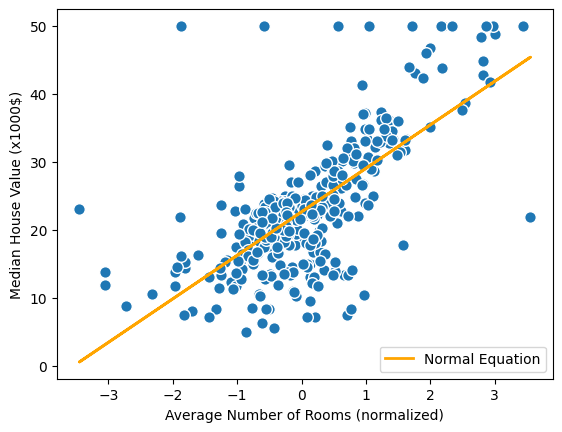

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

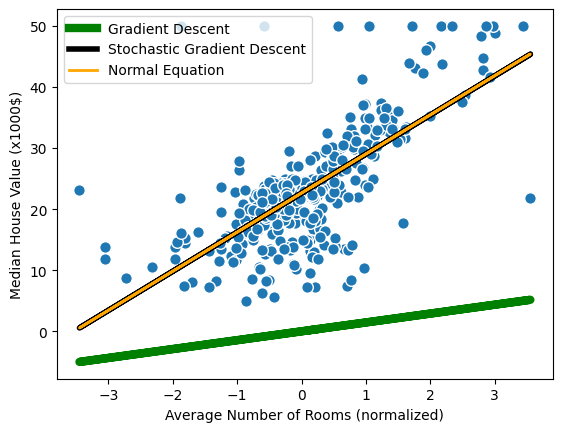

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [ ]:
w_GD = np.append(reg_GD.b, reg_GD.w)
w_GD

array([0.        , 1.45210653])

In [ ]:
w_SGD = reg_SGD.w
w_SGD

array([22.62083926,  6.39567675])

In [ ]:
w_NE = reg_NE.w
w_NE

array([22.64163118,  6.40020122])

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 21.605616
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 527.325326
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -6.076948
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

### Re-load Dataset

In [ ]:
# Re-load dataset
housing_dataset = pd.read_csv('D:/CS115.P12/Assignment_1/boston_housing.csv')
housing_dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [ ]:
features_housing = housing_dataset.drop(columns = ['MEDV']).columns.values
X = housing_dataset[features_housing]
y = housing_dataset['MEDV']
#features_housing


In [ ]:
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
missing_values_multivar_before = housing_dataset.isna().sum()
print ("Missing values on Boston Housing Dataset before standardizing:\n")
print(missing_values_multivar_before)


Missing values on Boston Housing Dataset before standardizing:

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




### Preprocessing Data

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# print X_train
print("Type of X_train:",type(X_train))
print("Shape of X_train:", X_train.shape)
print("First five elements of X_train are:\n", X_train[:5]) 

# print y_train
print("\nType of y_train:",type(y_train))
print ("Shape of y_train:", y_train.shape)
print("First five elements of y_train are:\n", y_train[:5])  

Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (354, 13)
First five elements of X_train are:
 [[2.98500e-02 0.00000e+00 2.18000e+00 0.00000e+00 4.58000e-01 6.43000e+00
  5.87000e+01 6.06220e+00 3.00000e+00 2.22000e+02 1.87000e+01 3.94120e+02
  5.21000e+00]
 [1.31580e-01 0.00000e+00 1.00100e+01 0.00000e+00 5.47000e-01 6.17600e+00
  7.25000e+01 2.73010e+00 6.00000e+00 4.32000e+02 1.78000e+01 3.93300e+02
  1.20400e+01]
 [1.71420e-01 0.00000e+00 6.91000e+00 0.00000e+00 4.48000e-01 5.68200e+00
  3.38000e+01 5.10040e+00 3.00000e+00 2.33000e+02 1.79000e+01 3.96900e+02
  1.02100e+01]
 [1.05393e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 5.93500e+00
  2.93000e+01 4.49860e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.86850e+02
  6.58000e+00]
 [1.55757e+01 0.00000e+00 1.81000e+01 0.00000e+00 5.80000e-01 5.92600e+00
  7.10000e+01 2.90840e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.68740e+02
  1.81300e+01]]

Type of y_train: <class 'numpy.ndarray'>
Shape of y_train: (354,)
First five 

### Data Visualization


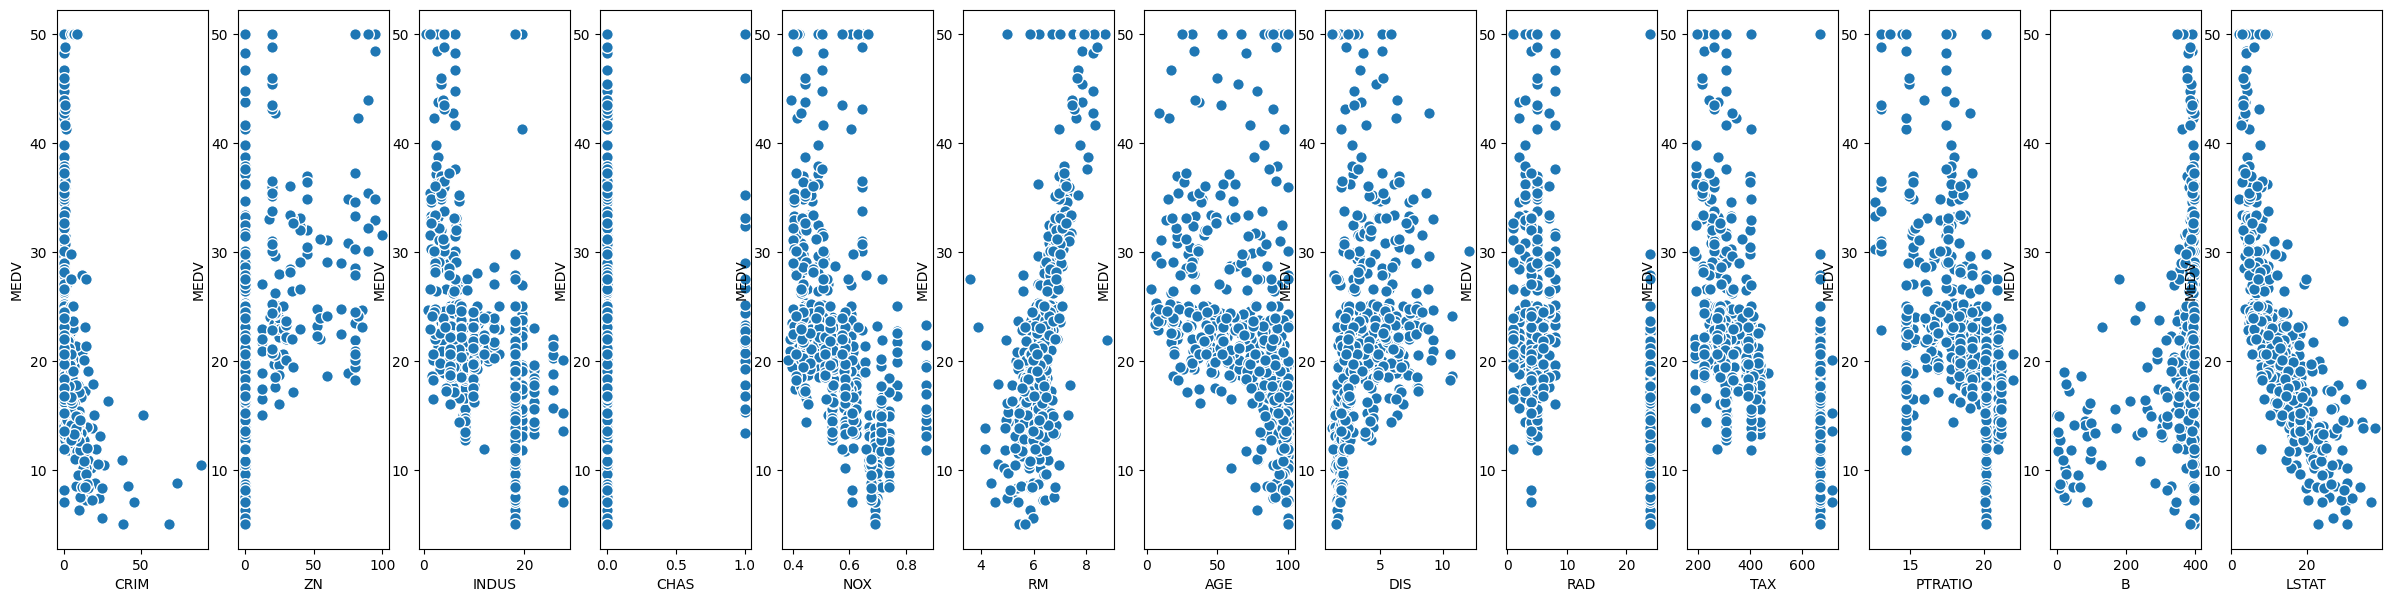

In [ ]:
plt.figure(figsize=(30, 7))

for i in range(13):
  plt.subplot(1, 13, i + 1)
  plt.scatter(housing_dataset[features_housing[i]], y, facecolor='tab:blue', edgecolor='white', s=70)
  plt.xlabel(features_housing[i])
  plt.ylabel("MEDV")

plt.show()

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

c:\Users\CONG PHAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\CONG PHAT\AppData\Local\Temp\ipykernel_2640\3975839585.py:22: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((X.dot(self.w) - y) ** 2)
C:\Users\CONG PHAT\AppData\Local\Temp\ipykernel_2640\3975839585.py:20: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.eta * gradients


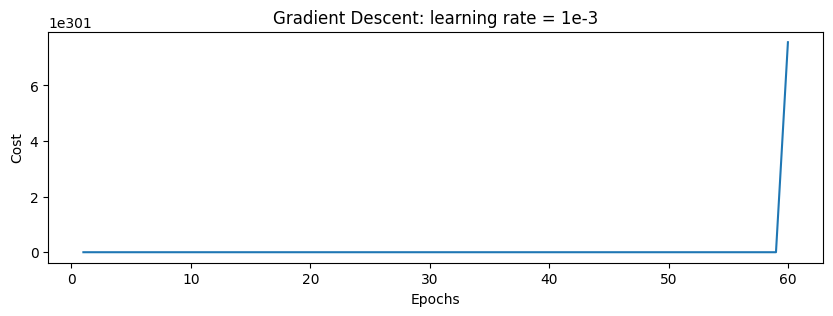

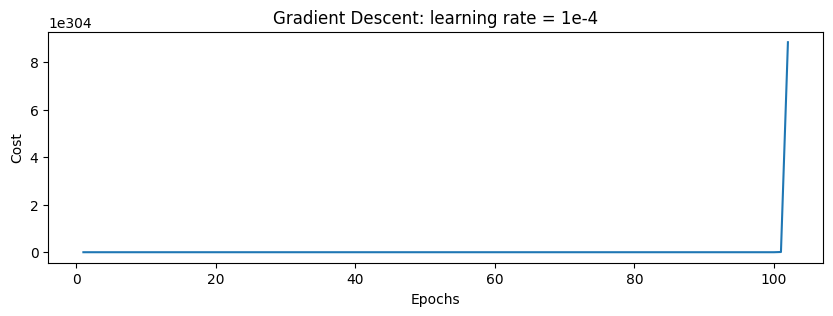

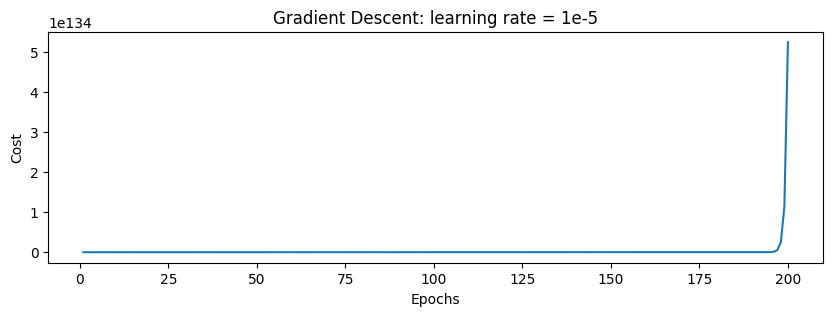

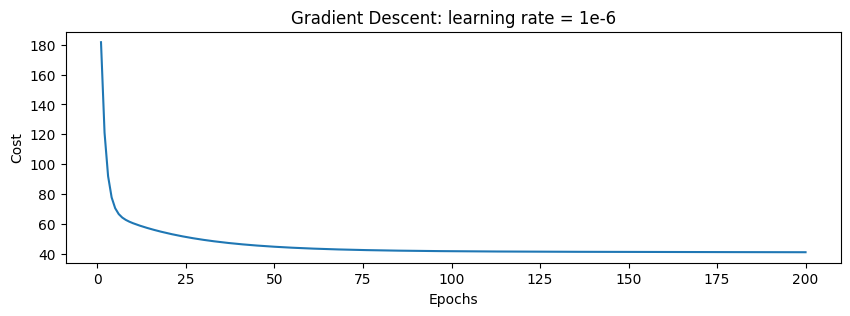

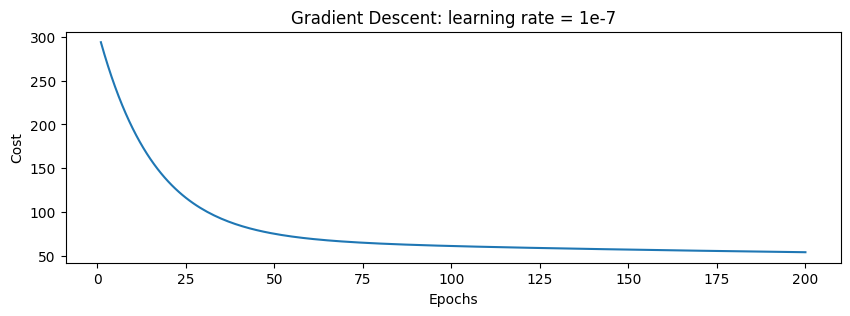

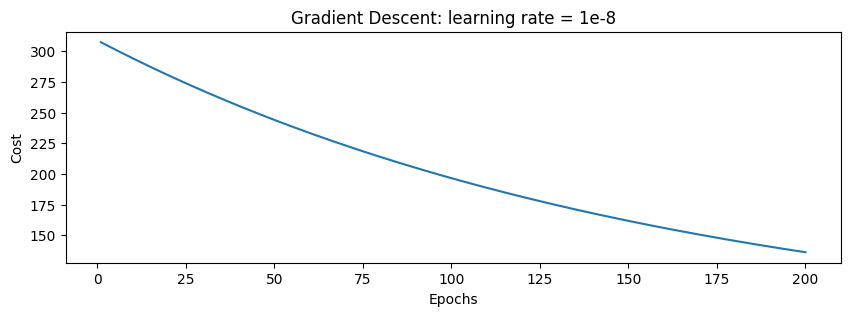

In [ ]:
# Initalize the GD model
Diff_learning_rate_multi = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8 ]
for eta in Diff_learning_rate_multi:

    reg_GD = LinearRegression_GD(eta, max_iter=200, random_state=42)

    # Train model
    reg_GD.fit(X_train, y_train)

    # Visualize the cost trend
    plt.figure(figsize=(10, 3))
    plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    if eta == 1e-3:
        plt.title('Gradient Descent: learning rate = 1e-3')
    elif eta == 1e-4:
        plt.title('Gradient Descent: learning rate = 1e-4')
    elif eta == 1e-5:
        plt.title('Gradient Descent: learning rate = 1e-5')
    elif eta == 1e-6:
        plt.title('Gradient Descent: learning rate = 1e-6')
    elif eta == 1e-7:
        plt.title('Gradient Descent: learning rate = 1e-7')
    else:
        plt.title('Gradient Descent: learning rate = 1e-8')
    plt.show()

# # Initalize the GD model
# reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42)
# reg_GD_1 = LinearRegression_GD(eta=1e-4, max_iter=200, random_state=42)
# reg_GD_2 = LinearRegression_GD(eta=1e-5, max_iter=200, random_state=42)
# reg_GD_3 = LinearRegression_GD(eta=1e-6, max_iter=200, random_state=42)
# reg_GD_4 = LinearRegression_GD(eta=1e-7, max_iter=200, random_state=42)
# reg_GD_5 = LinearRegression_GD(eta=1e-8, max_iter=200, random_state=42)

# # Train model
# reg_GD.fit(X_train, y_train)
# reg_GD_1.fit(X_train, y_train)
# reg_GD_2.fit(X_train, y_train)
# reg_GD_3.fit(X_train, y_train)
# reg_GD_4.fit(X_train, y_train)
# reg_GD_5.fit(X_train, y_train)

# # Visualize the cost trend
# plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, c='red', label='lr=1e-3')
# plt.plot(range(1, len(reg_GD_1.costs) + 1), reg_GD_1.costs, c='blue', label='lr=1e-4')
# plt.plot(range(1, len(reg_GD_2.costs) + 1), reg_GD_2.costs, c='yellow', label='lr=1e-5')
# plt.plot(range(1, len(reg_GD_3.costs) + 1), reg_GD_3.costs, c='orange', label='lr=1e-6')
# plt.plot(range(1, len(reg_GD_4.costs) + 1), reg_GD_4.costs, c='purple', label='lr=1e-7')
# plt.plot(range(1, len(reg_GD_5.costs) + 1), reg_GD_5.costs, c='green', label='lr=1e-8')
# plt.xlabel('Epochs')
# plt.ylabel('Cost')
# plt.title('Gradient Descent')
# plt.show()


📚📚 **What is suitable 'learning rate' value?** 📚📚

**Summary of Observations for six images with different learning rate values:**
- **Learning rate = 1e-3** (The first image): Diverges, indicating that the learning rate is too high and causing the algorithm to overshoot the optimal solution.
- **Learning rate = 1e-4** (The second image): Diverges, indicating that the learning rate is too high and causing the algorithm to overshoot the optimal solution.
- **Learning rate = 1e-5** (The third image): Diverges, indicating that the learning rate is too high and causing the algorithm to overshoot the optimal solution
- **Learning rate = 1e-6** (The fourth image): Rapid initial convergence but unstable with oscillations.
- **Learning rate = 1e-7** (The fifth image): Converges at a good speed and accuracy, indicating that this is the most suitable learning rate for the problem.
- **Learning rate = 1e-8** (The sixth image): Stable but extremely slow convergence, suggesting that the learning rate is too small.


**Conclusion:** 
- Based on the analysis of all six images, the learning rate of **1e-7** appears to be the most suitable for this particular problem, as it provides a good balance between convergence speed and accuracy.
- However, it's important to consider other factors such as the specific dataset, the complexity of the problem, and the desired level of accuracy when selecting the final learning rate.

In [ ]:
reg_GD = LinearRegression_GD(eta=1e-7, max_iter=200, random_state=42) #select learning rate = 1e-7
reg_GD.fit(X_train, y_train)
reg_GD.w

array([-4.40253436e-04,  2.76790314e-03,  2.88426720e-04,  1.71057613e-05,
        4.24860567e-05,  7.21166832e-04,  4.36069274e-03,  5.08523378e-04,
       -3.25414079e-05,  1.83179542e-02,  1.52888112e-03,  3.84601305e-02,
        8.81615249e-05])

### Stochastic Gradient Descent

In [ ]:
# Initialize the SGD model
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200,random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=200, random_state=42)

In [ ]:
reg_SGD.w = np.append(reg_SGD.intercept_, reg_SGD.coef_)
reg_SGD.w

array([-3.75300444e+07, -3.13680471e+09, -2.48129630e+09, -1.82272083e+09,
       -7.98006973e+08, -7.41654249e+07,  7.45005362e+08, -5.98418497e+08,
        6.70501334e+08, -3.52219436e+09, -3.45569352e+09, -2.32241780e+09,
        2.45919779e+09, -1.97473540e+09])

### Normal Equation

In [ ]:
# Add the '1' column to data
m1, n1 = X_train.shape
m2, n2 = X_test.shape

added_1 = np.hstack((np.array([[1] for _ in range(m1)]), X_train))
added_2 = np.hstack((np.array([[1] for _ in range(m2)]), X_test))
X_train = added_1
X_test_new = added_2

# X_train[:5]
# X_test[:5]

In [ ]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg_NE.w = np.append(reg_NE.intercept_, reg_NE.coef_)
reg_NE.w

array([ 3.16310840e+01,  0.00000000e+00, -1.33470103e-01,  3.58089136e-02,
        4.95226452e-02,  3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
       -1.08208352e-02, -1.38599824e+00,  2.42727340e-01, -8.70223437e-03,
       -9.10685208e-01,  1.17941159e-02, -5.47113313e-01])

### Algorithms Comparisons

In [ ]:
w_GD = np.append(reg_GD.b, reg_GD.w)
w_GD

array([ 0.00000000e+00, -4.40253436e-04,  2.76790314e-03,  2.88426720e-04,
        1.71057613e-05,  4.24860567e-05,  7.21166832e-04,  4.36069274e-03,
        5.08523378e-04, -3.25414079e-05,  1.83179542e-02,  1.52888112e-03,
        3.84601305e-02,  8.81615249e-05])

In [ ]:
w_SGD = reg_SGD.w
w_SGD

array([-3.75300444e+07, -3.13680471e+09, -2.48129630e+09, -1.82272083e+09,
       -7.98006973e+08, -7.41654249e+07,  7.45005362e+08, -5.98418497e+08,
        6.70501334e+08, -3.52219436e+09, -3.45569352e+09, -2.32241780e+09,
        2.45919779e+09, -1.97473540e+09])

In [ ]:
w_NE = reg_NE.w
w_NE

array([ 3.16310840e+01,  0.00000000e+00, -1.33470103e-01,  3.58089136e-02,
        4.95226452e-02,  3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
       -1.08208352e-02, -1.38599824e+00,  2.42727340e-01, -8.70223437e-03,
       -9.10685208e-01,  1.17941159e-02, -5.47113313e-01])

In [ ]:
y_pred_GD = reg_GD.predict(X_test)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_new)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.793305
MAE of SGD: 779041644939.1904
MAE of NE: 3.16271


In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 92.373308
MSE of SGD: 1.2375880164842116e+24
MSE of NE: 21.517444


In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -0.239692
R2 of SGD: -1.6609000163696169e+22
R2 of NE: 0.711226


## Experiment with Standardized Data

### Re-load Dataset

In [ ]:
# Re-load dataset
housing_dataset = pd.read_csv('D:/CS115.P12/Assignment_1/boston_housing.csv')
housing_dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Preprocessing Data

In [ ]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [ ]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])
housing_dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


*X_new <- 13 independent variables*

*y <- 'MEDV' column*

In [ ]:
features_housing = housing_dataset.drop(columns = ['MEDV']).columns.values
X_new = housing_dataset[features_housing]
y = housing_dataset['MEDV']


In [ ]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [ ]:
X_train_norm = np.array(X_train_norm)
X_test_norm = np.array(X_test_norm)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# print X_train
print("Type of X_train:",type(X_train_norm))
print("Shape of X_train:", X_train_norm.shape)
print("First five elements of X_train are:\n", X_train_norm[:5]) 

# print y_train
print("\nType of y_train:",type(y_train))
print ("Shape of y_train:", y_train.shape)
print("First five elements of y_train are:\n", y_train[:5])  

Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (354, 13)
First five elements of X_train are:
 [[-0.41704368 -0.48772236 -1.30687771 -0.27259857 -0.83528384  0.20709638
  -0.35115713  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41057102
  -1.04332233]
 [-0.40520503 -0.48772236 -0.16440754 -0.27259857 -0.06647246 -0.15476692
   0.13957876 -0.50624089 -0.40804109  0.14113426 -0.30309415  0.40158024
  -0.08593539]
 [-0.40056872 -0.48772236 -0.61672651 -0.27259857 -0.92166714 -0.85854831
  -1.23661537  0.62052658 -0.75292215 -1.04078303 -0.2568579   0.44105193
  -0.34245342]
 [-0.29786818 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.49810966
  -1.39663795  0.33444943 -0.6379618  -0.6012761   1.17646583  0.33086013
  -0.85128425]
 [ 1.39207714 -0.48772236  1.01599907 -0.27259857  0.21859243 -0.51093159
   0.0862379  -0.42148257  1.66124525  1.53092646  0.80657583  0.1322956
   0.76772295]]

Type of y_train: <class 'numpy.ndarray'>
Shape of y_train: (354,)
First five e

### Gradient Descent

- Experiment with
    - following learning rates = {1e-3, 1e-5, 1e-4}
    - max_iter = 200
    - random_state = 42

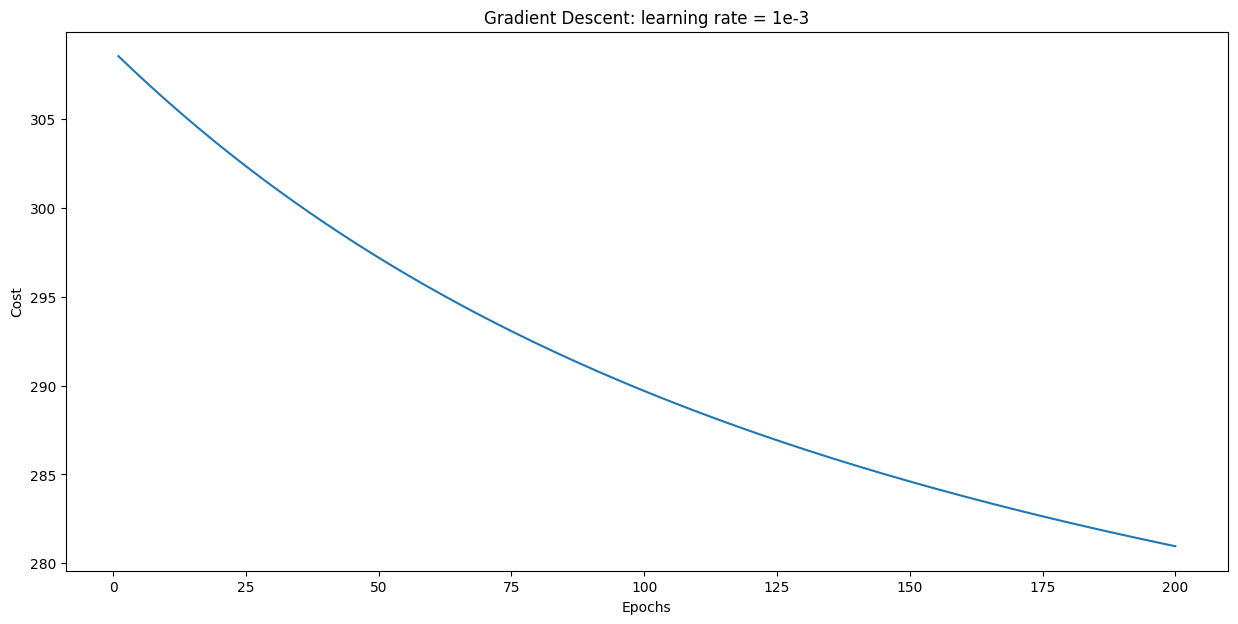

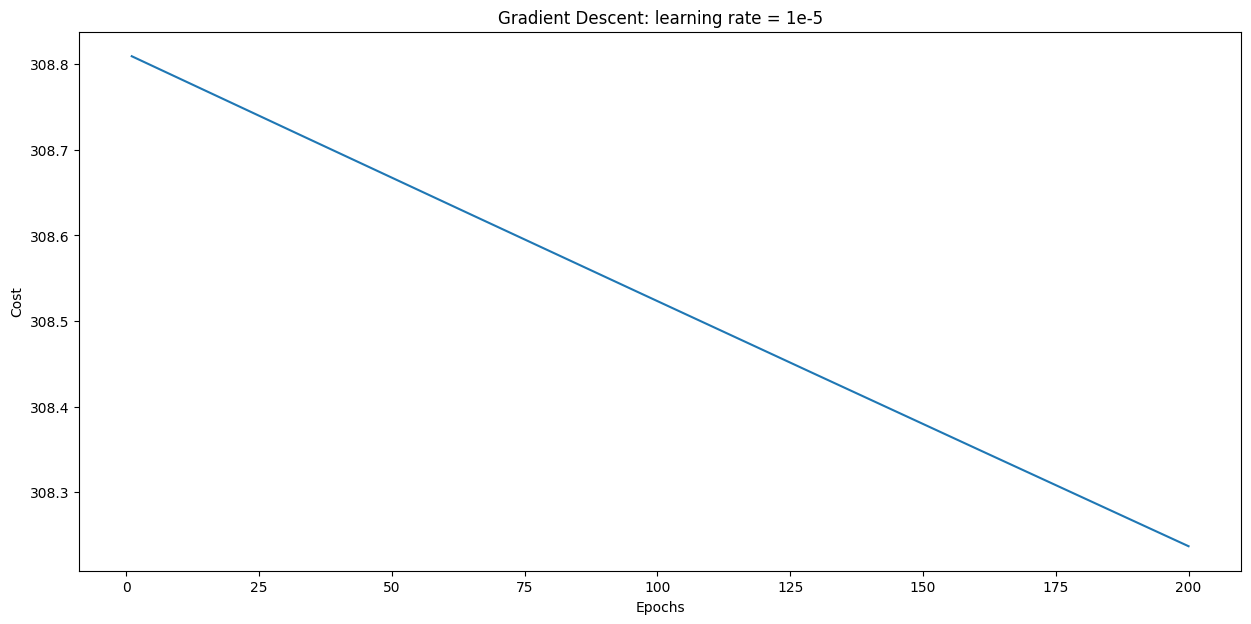

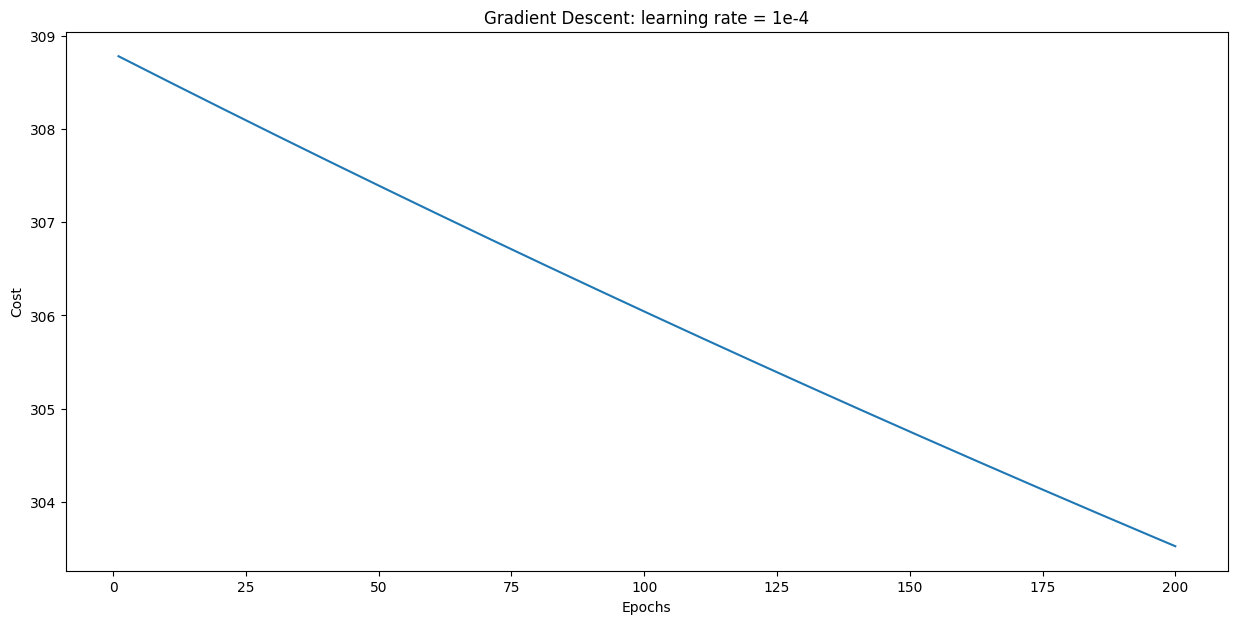

In [ ]:
# import matplotlib.pyplot as plt

# learning_rates = [1e-3, 1e-4, 1e-5]
# max_iter = 200
# random_state = 42
# costs_dict = {}

# for learning_rate in learning_rates:
#     reg_GD = LinearRegression_GD(eta=learning_rate, max_iter=max_iter, random_state=random_state)
#     reg_GD.fit(X_train_norm, y_train)
#     costs_dict[learning_rate] = reg_GD.costs
#     plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label=f'lr={learning_rate}')

# # Visualize the cost trend
# plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
# plt.xlabel('Epochs')
# plt.ylabel('Cost')
# plt.title('Gradient Descent')
# plt.show()

# Initalize the GD model
Diff_learning_rate_multivar = [1e-3, 1e-5, 1e-4]
for eta in Diff_learning_rate_multivar:

    reg_GD = LinearRegression_GD(eta, max_iter=200, random_state=42)

    # Train model on normalized data
    reg_GD.fit(X_train_norm, y_train)

    # Visualize the cost trend
    plt.figure(figsize=(15, 7))
    plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    if eta == 1e-3:
        plt.title('Gradient Descent: learning rate = 1e-3')
    elif eta == 1e-5:
        plt.title('Gradient Descent: learning rate = 1e-5')
    else:
        plt.title('Gradient Descent: learning rate = 1e-4')
    plt.show()

📚📚 **What is suitable 'learning rate' value?** 📚📚

**Summary of Observations from 3 images with different learning rate values:**
- **Learning rate = 1e-3** (The first image): 
    - **Rapid initial decrease:** The cost function drops significantly in the early epochs, indicating rapid progress.
    - **Steady decrease:** The cost continues to decrease steadily throughout the epochs, suggesting good convergence.
    - **No overshooting:** There's no evidence of the cost function increasing, indicating that the learning rate is not too high.
- **Learning rate = 1e-5** (The second image): Stable but extremely slow convergence.
    - **Steady decrease:** The cost function decreases steadily throughout the epochs, indicating good convergence.
    - **Slower convergence:** Compared to 1e-3, the decrease is slower.
- **Learning rate = 1e-4** (The third image): Steady convergence and good balance between speed and stability.
    - **Rapid initial decrease:** The cost function drops significantly in the early epochs.
    - **Steady decrease:** The cost continues to decrease, but at a slower pace compared to 1e-3.

**Conclusion:** 
- Based on these observations, the learning rate of **1e-3** appears to be the most suitable for this problem. It provides a good balance between convergence speed and accuracy, without exhibiting signs of overshooting or underfitting. 
- The other learning rates, **1e-4** and **1e-5**, are too small, leading to slower convergence.

In [ ]:
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42) # select learning rate = 1e-3
reg_GD.fit(X_train_norm, y_train)

### Stochastic Gradient Descent

In [ ]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200,random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

c:\Users\CONG PHAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [ ]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

array([-0.46555658,  0.31240384, -0.45697819,  0.43395699, -0.29014391,
        1.23819224, -0.28121023,  0.05801114, -0.39161297, -0.46255143,
       -0.98710057,  0.50053199, -1.10358977])

In [ ]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [ ]:
X_test_norm[:5]

array([[-0.40983668, -0.48772236, -1.03402724, -0.27259857, -0.38609067,
         0.18715116,  0.55208139, -0.54607682, -0.52300145, -0.66660821,
        -0.85792914,  0.42570183, -0.50645674],
       [-0.41394931,  1.22906036, -0.68968118,  3.66839786, -0.93030547,
         0.67438443, -1.26861989,  0.13431903, -0.6379618 , -0.91605809,
        -0.39556665,  0.44105193, -1.27881429],
       [-0.40821211, -0.48772236,  2.42256516, -0.27259857,  0.469104  ,
        -0.42972605,  1.0748218 , -0.91600909, -0.6379618 ,  1.79819419,
         0.76033959,  0.36660394,  0.75931252],
       [-0.40985297, -0.48772236, -0.04768006, -0.27259857, -1.22400869,
        -0.31290404, -2.16119024,  0.70937307, -0.6379618 , -0.61315466,
         0.34421334,  0.37537543, -0.99986846],
       [ 0.17184212, -0.48772236,  1.01599907, -0.27259857,  1.36749033,
         0.01761678,  0.8258978 , -0.67827698,  1.66124525,  1.53092646,
         0.80657583,  0.31156286,  0.64717349]])

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 21.921748
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 515.588778
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -5.919438
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

***$R^2$* (coefficient of determination)** is an indicator that helps measure how well a statistical model predicts an outcome: 
- The outcome is represented by the model’s dependent variable. The lowest possible value of R² is 0 and the highest possible value is 1. Put simply, the better a model is at making predictions, the closer its *$R^2$* will be to 1.
- More technically, *$R^2$* is a measure of goodness of fit. It is the proportion of variance in the dependent variable that is explained by the model.

**Example:** Imagine that you perform a simple linear regression that predicts students’ exam scores (dependent variable) from their time spent studying (independent variable).
- If the ***$R^2$*** is 0: The model does not explain the variation of the dependent variable at all, which is equivalent to predicting by the average value of the data.
- If the ***$R^2$*** is between 0 and 1: the model allows you to partially predict exam scores. The model’s estimates are not perfect, but they’re better than simply using the average exam score.
- If the ***$R^2$*** is 1: The model fully interprets the variability of the data, meaning that the predicted values exactly match the actual values.


**[Coefficient of Determination (R²) | Calculation & Interpretation](https://www.scribbr.com/statistics/coefficient-of-determination/#:~:text=R%C2%B2%20is%20a%20number%20between%200)** is the reference website for this *$R^2$* coefficient.



In [ ]:
import numpy as np
def r_squared(y_true, y_pred):
    # Calculate the mean of actual values
    mean_y = np.mean(y_true)

    # Total sum of squares (proportional to variance)
    ss_total = np.sum(( y_true - mean_y) ** 2)
    # Residual sum of squares
    ss_res = np.sum((y_true - y_pred) ** 2)
    # R² formula
    r2 = 1 - (ss_res / ss_total)    
    return r2



# source code : Chat-GPT .
